Years to reach 99% of capacity (399.6 plants): 16 years


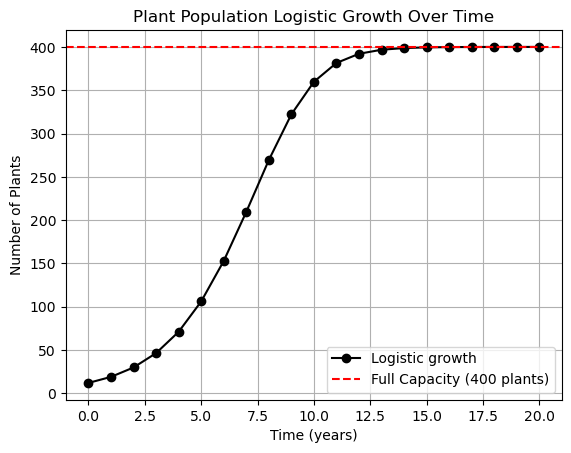

In [1]:
'''


Logistic Growth Model From Handbook of Quantitative Ecology without self-shading and explicit deaths

'''


import numpy as np
import matplotlib.pyplot as plt

#Defined terms
N0 = 12 # initial number of plants
r = 0.6 # net growth rate per year (births - deaths) (1-.4)
K = 400 # carrying capacity 
years = 20 # This is the amount of years to simulate 

# We nee to initialize arrays for time and population 
t = np.arange(0, years + 1)  # time steps in years
N_t = np.zeros_like(t, dtype=float)  # array to hold population values
N_t[0] = N0  # starting population at year 0

# Logistic growth calculation 
# Formula: N(t+1) = N(t) + r * N(t) * (1 - N(t)/K)
for i in range(1, len(t)):
    N_t[i] = N_t[i-1] + r * N_t[i-1] * (1 - N_t[i-1] / K)

# This is when the population first reaches 99.9% of K 
threshold = 0.999 * K  # 99.9% of carrying capacity
first_year = np.where(N_t >= threshold)[0][0] # first year reaching threshold. 

print(f"Years to reach 99% of capacity ({threshold:.1f} plants): {first_year} years")

# Below is to plot the logistic growth curve 

plt.plot(t, N_t, marker="o", color="black", label="Logistic growth")# logistic curve
plt.axhline(y=K, color="red", linestyle="--", label=f"Full Capacity (400 plants)") # 99% line
plt.title("Plant Population Logistic Growth Over Time") #title
plt.xlabel("Time (years)")# x-axis label
plt.ylabel("Number of Plants")# y-axis label
plt.legend()# show legend
plt.grid()# add grid
plt.show()# display plot


Years to reach 99.9% of effective capacity (239.8 plants): 15 years


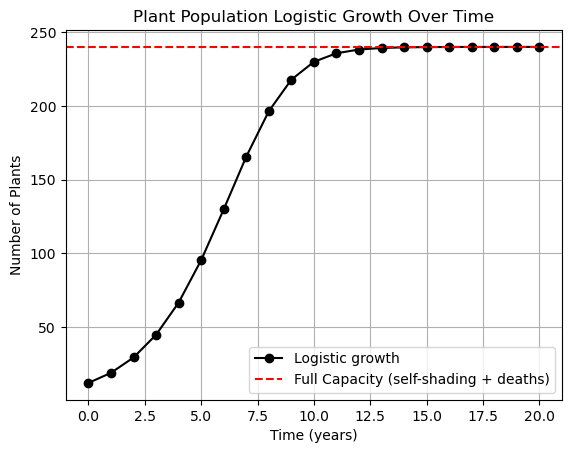

In [2]:
'''


Logistic Growth Model From Handbook of Quantitative Ecology with self-shading and explicit deaths

'''

import numpy as np
import matplotlib.pyplot as plt

#Defined terms
N0 = 12 # initial number of plants
r = 0.6 # net growth rate per year (births - deaths) (1-.4)
K = 400 # carrying capacity 
years = 20 # This is the amount of years to simulate 

# We nee to initialize arrays for time and population 
t = np.arange(0, years + 1)  # time steps in years
N_t = np.zeros_like(t, dtype=float)  # array to hold population values
N_t[0] = N0  # starting population at year 0

# Logistic growth calculation 
# Formula: N(t+1) = N(t) + N(t) * (1 - N(t)/K)- D * N(t)

for i in range(1, len(t)):
    # Using births = N_t[i-1] * (1 - N_t[i-1] / K) and deaths = 0.4 * N_t[i-1]
    N_t[i] = N_t[i-1] + N_t[i-1] * (1 - N_t[i-1] / K) - 0.4 * N_t[i-1]


K_eff = 0.6 * K  # effective carrying capacity implied by this self-shading and explicit deaths 
threshold = 0.999 * K_eff # 99.9% of effective carrying capacity 
hits = np.where(N_t >= threshold)[0] # indices where population crosses threshold


#This is too avoid IndexError:

if hits.size > 0:
    first_year = hits[0]  #first year reaching threshold. From there you will go till eaching around 400 plants
    print(f"Years to reach 99.9% of effective capacity ({threshold:.1f} plants): {first_year} years")
else:
    #safe fallback to avoid IndexError if threshold isn't reached within years
    first_year = None
    print(f"Did not reach 99.9% of effective capacity ({threshold:.1f} plants) within {years} years.")

# Below is to plot the logistic growth curve 

plt.plot(t, N_t, marker="o", color="black", label="Logistic growth")# logistic curve
plt.axhline(y=K_eff, color="red", linestyle="--", label=f"Full Capacity (self-shading + deaths)")  # shows carrying capacity
plt.title("Plant Population Logistic Growth Over Time") #title
plt.xlabel("Time (years)")# x-axis label
plt.ylabel("Number of Plants")# y-axis label
plt.legend()# show legend
plt.grid()# add grid
plt.show()# display plot
